<a href="https://colab.research.google.com/github/shubh8902/Regression_ML_Models/blob/main/steel_yield_strength_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steel's yield strength prediction

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [ ]:
dataset = pd.read_csv("steel_strength.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(x[:, 2:3])
print(y)

[[0.05]
 [0.01]
 [0.01]
 [0.05]
 [0.05]
 [0.02]
 [0.05]
 [0.57]
 [0.01]
 [0.01]
 [0.05]
 [0.05]
 [0.01]
 [0.05]
 [0.01]
 [0.01]
 [0.05]
 [0.01]
 [0.01]
 [0.01]
 [0.05]
 [0.05]
 [0.01]
 [0.56]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.05]
 [0.01]
 [0.01]
 [0.01]
 [0.43]
 [0.01]
 [0.57]
 [0.01]
 [0.01]
 [0.66]
 [0.01]
 [0.01]
 [0.05]
 [0.55]
 [0.01]
 [0.51]
 [0.51]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.51]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.63]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.46]
 [0.01]
 [0.02]
 [0.01]
 [0.01]
 [0.01]
 [0.02]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.04]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.11]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.05]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [2.09]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]


## Taking care of missing data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 1:])
x = imputer.transform(x[:, 1:])

In [ ]:
print(x[:, -1])

[ 7.          8.         14.00726073  9.          8.5        19.7
  3.7         2.         10.         11.5         7.7         9.3
 12.          8.3         4.         20.8         9.7         4.
 10.3        18.          7.7         8.7        11.5        12.
 21.8        17.8        11.5        13.6         4.         12.
  9.3        12.         12.         11.         19.         12.5
 13.4        13.8        19.1         5.8         6.         11.
  8.5        11.         13.3        18.5        13.4        16.
 10.6        20.         17.         12.         17.9        14.3
 14.1        19.         10.8        18.5        14.00726073 13.4
 18.5        14.00726073 11.4        22.         14.         18.1
 17.         18.5        15.3        12.5        10.         16.9
 14.         10.         17.8        19.3        16.2        14.3
 11.         14.00726073  6.5        15.8        17.         14.00726073
 16.8        14.00726073 14.00726073 16.2        14.6         6.
 17.7    

## Encoding categorical data in Formula Column by using Frequency encoding

In [ ]:
frequency_encoding = dataset['formula'].value_counts().to_dict()
dataset['formula'] = dataset['formula'].map(frequency_encoding)

In [ ]:
print(x[:, 0])

[0.02 0.18 0.   0.01 0.01 0.19 0.   0.1  0.01 0.16 0.01 0.   0.16 0.
 0.16 0.2  0.02 0.16 0.01 0.01 0.01 0.01 0.07 0.16 0.16 0.2  0.01 0.01
 0.15 0.16 0.01 0.21 0.21 0.01 0.21 0.   0.07 0.2  0.21 0.09 0.12 0.17
 0.01 0.04 0.08 0.2  0.1  0.12 0.01 0.01 0.02 0.16 0.2  0.24 0.15 0.01
 0.01 0.2  0.01 0.09 0.15 0.   0.   0.01 0.16 0.19 0.11 0.19 0.2  0.15
 0.16 0.2  0.15 0.17 0.2  0.19 0.22 0.24 0.25 0.01 0.01 0.01 0.02 0.01
 0.21 0.35 0.   0.19 0.01 0.04 0.15 0.17 0.21 0.18 0.21 0.01 0.19 0.22
 0.21 0.23 0.03 0.19 0.2  0.21 0.21 0.01 0.02 0.01 0.2  0.16 0.02 0.2
 0.   0.   0.02 0.06 0.19 0.2  0.01 0.01 0.02 0.23 0.25 0.02 0.02 0.24
 0.22 0.01 0.15 0.2  0.23 0.03 0.03 0.1  0.22 0.21 0.23 0.23 0.24 0.03
 0.21 0.23 0.08 0.02 0.01 0.07 0.02 0.02 0.09 0.01 0.02 0.02 0.04 0.04
 0.21 0.01 0.17 0.07 0.03 0.35 0.01 0.09 0.19 0.09 0.1  0.16 0.16 0.02
 0.11 0.24 0.23 0.02 0.18 0.24 0.1  0.15 0.09 0.03 0.02 0.15 0.03 0.04
 0.03 0.03 0.03 0.03 0.03 0.04 0.04 0.04 0.12 0.03 0.03 0.03 0.04 0.04
 0.03 0.2

## Feature Scaling

In [ ]:
# numerical_features = dataset.select_dtypes(include=['number']).columns
# x = dataset[numerical_features.append(pd.Index(['encoded_formula']))].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
print(x[:, :4])

[[-0.70237895 -0.24277061 -0.2952721  -1.48294986]
 [ 0.76775762 -0.34366229 -0.36425368  0.99606903]
 [-0.88614602 -0.34366229 -0.36425368  0.11558354]
 ...
 [ 2.5135448   0.05990444 -0.36425368 -0.52493735]
 [ 2.88107895  0.11035028 -0.36425368 -0.19452456]
 [ 1.59470944  0.31213364 -0.36425368 -1.4091146 ]]


## Splitting the dataset into the training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(249, 14)
(249,)
(63, 14)
(63,)


## Analyzing the dataset

### Pearson Correlation Matrix

                       c        mn        si        cr        ni        mo  \
c               1.000000  0.023988  0.005264  0.229187 -0.654511  0.151569   
mn              0.023988  1.000000  0.023411  0.212439 -0.127005 -0.131823   
si              0.005264  0.023411  1.000000  0.037987  0.011784 -0.327833   
cr              0.229187  0.212439  0.037987  1.000000 -0.810792 -0.021504   
ni             -0.654511 -0.127005  0.011784 -0.810792  1.000000 -0.195137   
mo              0.151569 -0.131823 -0.327833 -0.021504 -0.195137  1.000000   
v               0.322590 -0.054413 -0.107197 -0.124141 -0.077683  0.130327   
n               0.082636  0.099646 -0.031985  0.330063 -0.350272  0.289887   
nb              0.103380 -0.023490 -0.013704 -0.068385 -0.016610  0.003270   
co              0.424501 -0.176480 -0.034220  0.123610 -0.411625  0.144591   
w               0.076217  0.055299 -0.031223  0.046756 -0.122287 -0.200943   
al             -0.412173 -0.022396 -0.170371  0.087755  0.218080

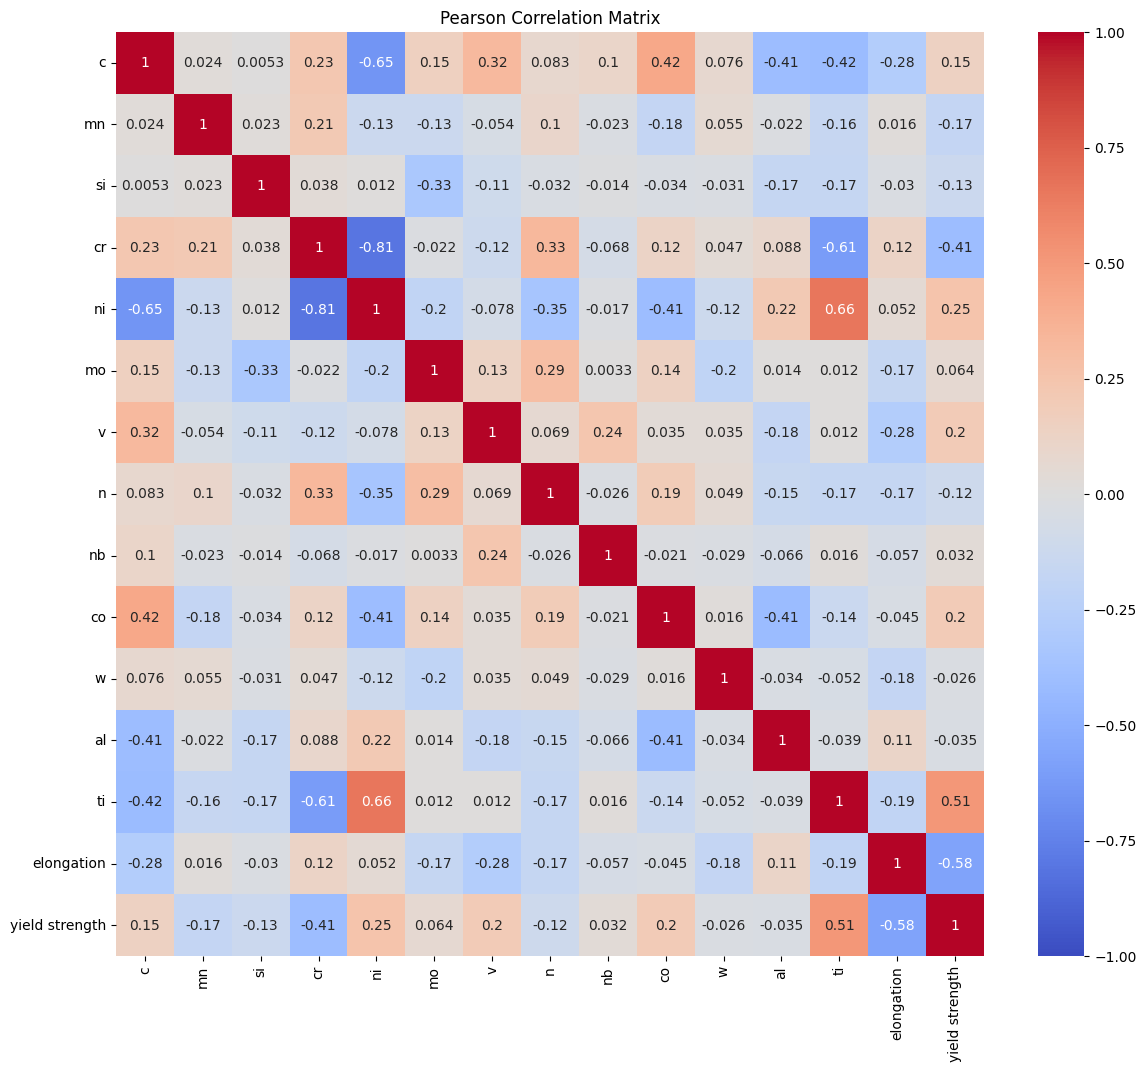

In [ ]:
# Calculate the Pearson correlation matrix
dataset_corr = dataset.iloc[:, 1:]
correlation_matrix = dataset_corr.corr(method='pearson')

# Print the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')
plt.show()

## Applying Regression Model

### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred_lr = LR.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("R2 score:", r2_lr)
print("MSE:", mse_lr)


R2 score: 0.5640472098902987
MSE: 33456.92767584654


### Support Vector Regression

In [ ]:
from sklearn.svm import SVR
SVR = SVR(kernel='rbf')
SVR.fit(x_train, y_train)
y_pred_svr = SVR.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("R2 score:", r2_svr)
print("MSE:", mse_svr)

R2 score: 0.038682390818464696
MSE: 73775.72630240775


### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
y_pred_dt = DT.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("R2 score:", r2_dt)
print("MSE:", mse_dt)

R2 score: 0.6838125247814497
MSE: 24265.612539682537


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100)
RF.fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("R2 score:", r2_rf)
print("MSE:", mse_rf)

R2 score: 0.81873361234084
MSE: 13911.176988793684


### XGBoost

In [ ]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(x_train, y_train)
y_pred_xgb = XGB.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("R2 score:", r2_xgb)
print("MSE:", mse_xgb)

R2 score: 0.8338811219224168
MSE: 12748.690719552274


### CatBoost

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostRegressor
CB = CatBoostRegressor()
CB.fit(x_train, y_train)
y_pred_cb = CB.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error
r2_cb = r2_score(y_test, y_pred_cb)
mse_cb = mean_squared_error(y_test, y_pred_cb)
print("R2 score:", r2_cb)
print("MSE:", mse_cb)

Learning rate set to 0.032868
0:	learn: 300.3474957	total: 4.17ms	remaining: 4.17s
1:	learn: 295.3846309	total: 7.08ms	remaining: 3.53s
2:	learn: 289.4019239	total: 10.1ms	remaining: 3.37s
3:	learn: 284.8923935	total: 12.5ms	remaining: 3.11s
4:	learn: 280.0209856	total: 14.4ms	remaining: 2.87s
5:	learn: 274.7294462	total: 15.5ms	remaining: 2.57s
6:	learn: 270.1578500	total: 16.7ms	remaining: 2.36s
7:	learn: 265.4042475	total: 18.7ms	remaining: 2.32s
8:	learn: 260.1736451	total: 20ms	remaining: 2.2s
9:	learn: 256.2211830	total: 22.1ms	remaining: 2.19s
10:	learn: 252.6122248	total: 23.2ms	remaining: 2.09s
11:	learn: 248.0096739	total: 24.9ms	remaining: 2.05s
12:	learn: 244.1079819	total: 25.9ms	remaining: 1.97s
13:	learn: 240.0388977	total: 27.2ms	remaining: 1.92s
14:	learn: 236.4410728	total: 28.3ms	remaining: 1.86s
15:	learn: 232.8812512	total: 29.7ms	remaining: 1.83s
16:	learn: 229.0871455	total: 30.8ms	remaining: 1.78s
17:	learn: 225.1450309	total: 31.9ms	remaining: 1.74s
18:	learn: 

## Hyperparameter Tuning

### Applying Hyperparameter tuning on Random Forest using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {-best_score}')

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
r2_score = r2_score(y_test, predictions)
print(f'Test Set Mean Squared Error: {mse}')
print(f'Test Set R2 Score: {r2_score}')

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-Validation Score: 19365.877618374034
Test Set Mean Squared Error: 14329.457529267604
Test Set R2 Score: 0.8132833040987044


### Applying Hyperparameter tuning on Catboost using Randomized Search

In [ ]:
from sklearn.model_selection import  RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the CatBoostRegressor model
model = CatBoostRegressor(loss_function='RMSE', verbose=0)

# Define the parameter distribution for hyperparameter tuning
param_distributions = {
    'learning_rate': uniform(0.01, 0.19),  # Uniform distribution from 0.01 to 0.2
    'depth': randint(4, 10),               # Random integers from 4 to 9
    'iterations': randint(100, 1000),      # Random integers from 100 to 1000
    'l2_leaf_reg': randint(1, 10)          # Random integers from 1 to 10
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                    n_iter=50, cv=3, scoring='neg_mean_squared_error',
                                    n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(x_train, y_train)

# Best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score (MSE): {-best_score}')

# Evaluate the model with the best parameters on the test set
best_model = random_search.best_estimator_
predictions = best_model.predict(x_test)

# Calculate MSE and R² score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Test Set Mean Squared Error: {mse}')
print(f'Test Set R² Score: {r2}')

Best Parameters: {'depth': 9, 'iterations': 970, 'l2_leaf_reg': 9, 'learning_rate': 0.1450259490402996}
Best Cross-Validation Score (MSE): 17507.395143272548
Test Set Mean Squared Error: 11330.393544923776
Test Set R² Score: 0.8523619165869663
